In [16]:
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
#from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import joblib
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

data = pd.read_csv('fifth-run/feats_version_5_22_acc.csv')
data = data[~data["activity"].str.contains("jogging")]
data["activity"] = data["activity"].replace(["sitting", "lying"], "resting")

result = data[data["name"].str.contains("kuba")]

result_train = data[data["name"].str.contains("kuba") == False]

result_train.drop('name', axis=1, inplace=True)
result.drop('name', axis=1, inplace=True)

X_train = result_train.iloc[:, :-1].values
y_train = result_train.iloc[:, -1].values

X_test = result.iloc[:, :-1].values
y_test = result.iloc[:, -1].values


# Przykładowe dane
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Tworzenie i trenowanie modelu SVM
classifier = svm.SVC(kernel='linear', C=0.001, max_iter=50000)
classifier.fit(X_train, y_train)

# Predykcja na danych testowych
y_pred = classifier.predict(X_val)

# Ocen dokładność modelu
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

# Zapisz model do pliku
joblib.dump(classifier, 'modelsvm.h5')

Accuracy: 0.7789115646258503


['modelsvm.h5']

In [5]:
reg = SVC()
parameters = {'C': [0.001, 0.01, 0.1, 1, 10],  'max_iter': [50, 100, 40000, 30000, 50000], 'kernel': ('linear', 'poly', 'rbf', 'sigmoid')}
grid_search = GridSearchCV(reg, parameters, cv=5, scoring='accuracy')  # Ustawienie scoring na 'accuracy' dla klasyfikacji
grid_search.fit(X_train, y_train)
print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'C': 0.001, 'kernel': 'linear', 'max_iter': 50000}
SVC(C=0.001, kernel='linear', max_iter=50000)
0.7511278195488721


Classification Report:
               precision    recall  f1-score   support

  schodzenie       0.42      0.83      0.56        12
  odpoczynek       1.00      0.78      0.87       107
   przysiady       0.54      0.39      0.46        33
      stanie       0.73      1.00      0.85        36
  wchodzenie       0.00      0.00      0.00        15
   chodzenie       0.86      0.96      0.91        91

    accuracy                           0.78       294
   macro avg       0.59      0.66      0.61       294
weighted avg       0.80      0.78      0.78       294



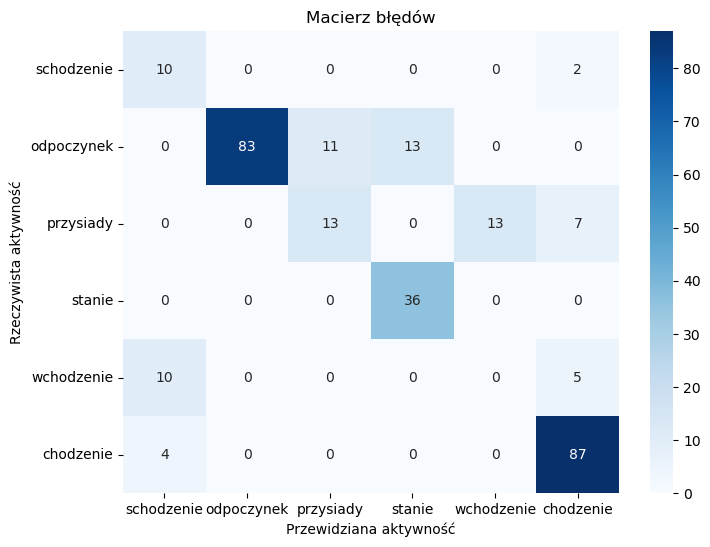

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
class_mapping = {
    0: "schodzenie",
    1: "odpoczynek",
    2: "przysiady",
    3: "stanie",
    4: "wchodzenie",
    5:  "chodzenie" }

listt =[]
for key in class_mapping.values():
    listt.append(key)
print("Classification Report:\n", classification_report(y_val, y_pred, target_names=listt))

# Generate and print confusion matrix
confusion_mtx = confusion_matrix(y_val, y_pred)
#print("Confusion Matrix:\n", confusion_mtx)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=listt, yticklabels=listt)
plt.xlabel('Przewidziana aktywność')
plt.ylabel('Rzeczywista aktywność')
plt.title('Macierz błędów')
plt.show()